In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
import os

# Check the current working directory
print("Current working directory:", os.getcwd())

os.chdir(os.path.dirname(os.getcwd()))

# List the files in the current directory
print("Files in the current directory:", os.listdir())

# Adjust the file path as needed
file_path = 'data/greatschools/review_data_all_states.csv'

# Check if the file exists
if os.path.exists(file_path):
	# The data we scraped from GreatSchools.org review pages
	data = pd.read_csv(file_path)
	print("File loaded successfully.")
else:
	print(f"File not found: {file_path}")

Current working directory: /Users/huangyiyang/Desktop/Winter_2025/MACS30122/final-project-ascending
Files in the current directory: ['course-materials(jan 22)', '.DS_Store', 'course-materials(Feb 10)', 'pa3-carrieeehuang', 'course-materials(Feb 19)', 'course-materials(jan 15)', 'pa1-carrieeehuang.zip', 'Project', 'scraper_20250221.log', 'course-materials(jan 27)', 'final-project-ascending', 'review_data_all_states.csv', '30122 PA3.pdf', 'course-materials(jan 13)', 'copy_pa2.py', 'course-materials(Feb 18)', 'course-materials(Feb 12)', 'course-materials(Feb 10-2)', 'ascending_macs', 'course-materials(jan 29)', 'pa1-carrieeehuang', '~$5_30122_FinalProject_Proposal.docx']
File not found: data/greatschools/review_data_all_states.csv


In [37]:
data.head()

,universal_id,overview-url,state,reviews,sentiment_scores
0,2613500,https://www.greatschools.org/michigan/clay-tow...,MI,[],NaN
1,2613517,https://www.greatschools.org/michigan/clay-tow...,MI,[],NaN
2,2613577,https://www.greatschools.org/michigan/clay-tow...,MI,[],NaN
3,2600307,https://www.greatschools.org/michigan/algonac/...,MI,"[""it's an experience of a life time"", 'Terribl...","{'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'co..."
4,2600311,https://www.greatschools.org/michigan/clay/311...,MI,[],NaN


In [36]:
data.describe()

,universal_id
count,1.961200e+04
mean,2.688328e+06
std,1.413926e+06
min,1.700001e+06
25%,1.707079e+06
50%,1.803452e+06
75%,2.608144e+06
max,5.507432e+06


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19612 entries, 0 to 19611
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   universal_id      19612 non-null  int64 
 1   overview-url      19612 non-null  object
 2   state             19612 non-null  object
 3   reviews           19612 non-null  object
 4   sentiment_scores  8519 non-null   object
dtypes: int64(1), object(4)
memory usage: 766.2+ KB


In [39]:
# Check for missing values
review_na = data['reviews'].isna()
data[review_na].count()

universal_id        0
overview-url        0
state               0
reviews             0
sentiment_scores    0
dtype: int64

In [12]:
# check how many rows has no reviews
no_review = data['reviews'] == '[]'
data[no_review].count()

universal_id        11093
overview-url        11093
state               11093
reviews             11093
sentiment_scores        0
dtype: int64

In [40]:
num_row = data.shape[0]
num_row

19612

In [41]:
percentage_no_review = data[no_review].count() / num_row * 100
percentage_no_review

universal_id        56.562309
overview-url        56.562309
state               56.562309
reviews             56.562309
sentiment_scores     0.000000
dtype: float64

In [42]:
# Check descriptives for each state
groupby_state = data.groupby('state')
groupby_state.describe()
groupby_state.count()

,universal_id,overview-url,reviews,sentiment_scores
state,,,,
IL,7273,7273,7273,3166
IN,3297,3297,3297,1418
MI,5310,5310,5310,2382
WI,3732,3732,3732,1553


<Axes: xlabel='state'>

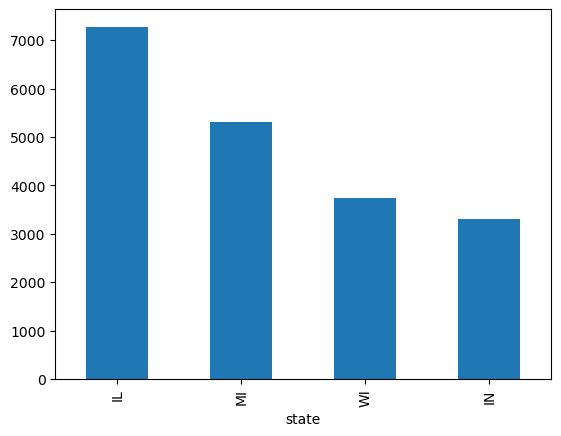

In [43]:
data['state'].value_counts()
data['state'].value_counts().plot(kind='bar')

<Axes: xlabel='state'>

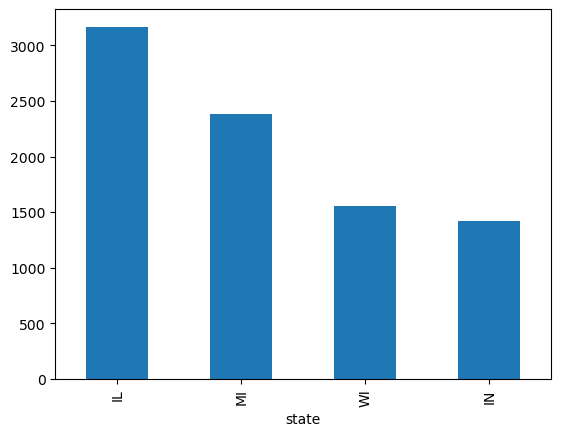

In [45]:
data_not_empty = data[~no_review]
data_not_empty['state'].value_counts().plot(kind='bar')

In [47]:
data_not_empty = data_not_empty.copy()
data_not_empty.head()

,universal_id,overview-url,state,reviews,sentiment_scores
3,2600307,https://www.greatschools.org/michigan/algonac/...,MI,"[""it's an experience of a life time"", 'Terribl...","{'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'co..."
5,2600334,https://www.greatschools.org/michigan/almont/3...,MI,['This school needs work. The bulling is a maj...,"{'neg': 0.124, 'neu': 0.739, 'pos': 0.137, 'co..."
6,2600335,https://www.greatschools.org/michigan/almont/3...,MI,['The ENTIRE school district has lack of commu...,"{'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co..."
9,2600395,https://www.greatschools.org/michigan/armada/3...,MI,"[""BULLYING\nMy son started at Armada Middle 3...","{'neg': 0.054, 'neu': 0.725, 'pos': 0.221, 'co..."
13,2605010,https://www.greatschools.org/michigan/armada/5...,MI,['Excellent school district. Has all the extra...,"{'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp..."


In [48]:
print(data_not_empty['sentiment_scores'].head())

3     {'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'co...
5     {'neg': 0.124, 'neu': 0.739, 'pos': 0.137, 'co...
6     {'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co...
9     {'neg': 0.054, 'neu': 0.725, 'pos': 0.221, 'co...
13    {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...
Name: sentiment_scores, dtype: object


In [49]:

senti_res = data_not_empty['sentiment_scores'].iloc[0]

senti_res

# convert the result string to dictionary
import ast
senti_res_dict = ast.literal_eval(senti_res)
senti_res_dict

{'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'compound': 0.9787}

In [50]:
def parse_dict(x):
    # If the cell is NaN or None, just return NaN
    if pd.isnull(x):
        return np.nan
    else:
        # Convert string to a dictionary
        return ast.literal_eval(x)


# Apply parse_dict to each value in 'sentiment_scores'
data_not_empty['sentiment_scores_dict'] = data_not_empty['sentiment_scores'].apply(parse_dict)


In [55]:
data_not_empty['sentiment_scores_dict'].head()


3     {'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'co...
5     {'neg': 0.124, 'neu': 0.739, 'pos': 0.137, 'co...
6     {'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'co...
9     {'neg': 0.054, 'neu': 0.725, 'pos': 0.221, 'co...
13    {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'comp...
Name: sentiment_scores_dict, dtype: object

In [56]:
type(data_not_empty['sentiment_scores_dict'].iloc[1])

dict

In [57]:
for i, val in enumerate(data_not_empty['sentiment_scores_dict'].head(10)):
    print(i, val, type(val))

0 {'neg': 0.058, 'neu': 0.809, 'pos': 0.133, 'compound': 0.9787} <class 'dict'>
1 {'neg': 0.124, 'neu': 0.739, 'pos': 0.137, 'compound': 0.8351} <class 'dict'>
2 {'neg': 0.115, 'neu': 0.746, 'pos': 0.139, 'compound': 0.9828} <class 'dict'>
3 {'neg': 0.054, 'neu': 0.725, 'pos': 0.221, 'compound': 0.9996} <class 'dict'>
4 {'neg': 0.0, 'neu': 0.766, 'pos': 0.234, 'compound': 0.9722} <class 'dict'>
5 {'neg': 0.127, 'neu': 0.764, 'pos': 0.108, 'compound': -0.7523} <class 'dict'>
6 {'neg': 0.092, 'neu': 0.647, 'pos': 0.261, 'compound': 0.9982} <class 'dict'>
7 {'neg': 0.084, 'neu': 0.701, 'pos': 0.215, 'compound': 0.9996} <class 'dict'>
8 {'neg': 0.058, 'neu': 0.746, 'pos': 0.196, 'compound': 0.9998} <class 'dict'>
9 {'neg': 0.015, 'neu': 0.859, 'pos': 0.126, 'compound': 0.9936} <class 'dict'>


In [63]:
print(data_not_empty[['reviews']].head(10))

                                              reviews
3   ["it's an experience of a life time", 'Terribl...
5   ['This school needs work. The bulling is a maj...
6   ['The ENTIRE school district has lack of commu...
9   ["BULLYING\nMy  son started at Armada Middle 3...
13  ['Excellent school district. Has all the extra...
15  ['Top Notch education!  Best in St.Clair Count...
18  ['I believe this school needs an overhaul and ...
19  ['The teachers were horrific. Would never reco...
20  ['The biggest problem with Eton Academy is tha...
21  ['Gateway Montessori School is a friendly cari...


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt


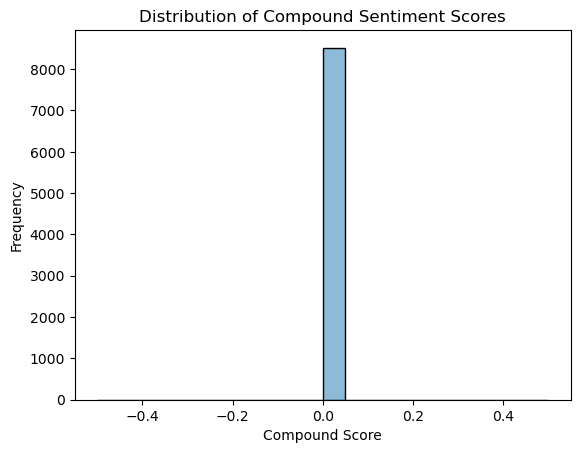

In [60]:
sns.histplot(data=data_not_empty, x=(data_not_empty['sentiment_scores_dict']=='compound'), bins=20, kde=True)
plt.title("Distribution of Compound Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

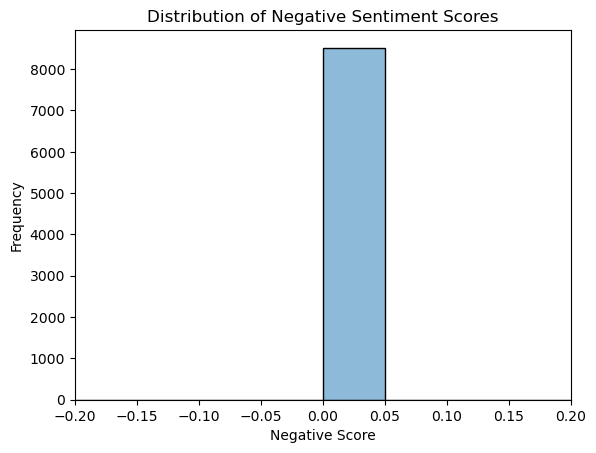

In [65]:
sns.histplot(data=data_not_empty, x=(data_not_empty['sentiment_scores_dict']=='neg'), bins=20, kde=True)
plt.title("Distribution of Negative Sentiment Scores")
plt.xlim(-0.2, 0.2)
plt.xlabel("Negative Score")
plt.ylabel("Frequency")
plt.show()

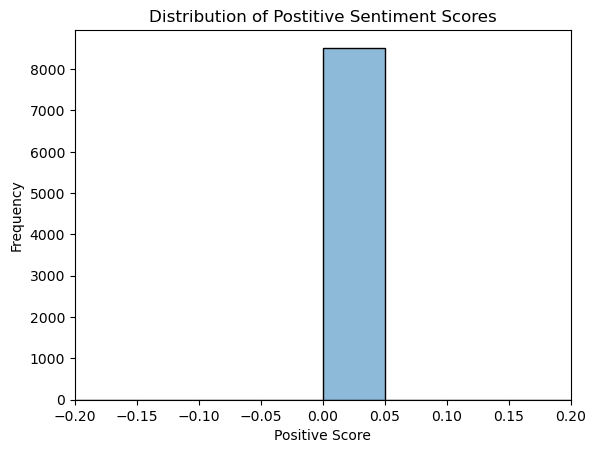

In [64]:
sns.histplot(data=data_not_empty, x=(data_not_empty['sentiment_scores_dict']=='pos'), bins=20, kde=True)
plt.title("Distribution of Postitive Sentiment Scores")
plt.xlim(-0.2, 0.2)
plt.xlabel("Positive Score")
plt.ylabel("Frequency")
plt.show()